# Urban Water Quality Prediction
Importing necessary libraries

In [1]:
import numpy as np 
#import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Importing dataset
1. Since data is in form of csv file we have to use pandas read_csv to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation   such as null values in a column or a row
3. Check whether any null values are there or not. if it is present then following can be done,
   a.Imputing data using Imputation method in sklearn
   b.Filling NaN values with mean, median and mode using fillna() method
4. Describe data --> which can give statistical analysis

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_355b5dd4dbb7461791ffd93b0ad415e9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='IRaJvp6SfsQhZDf62MvCWoNrKIWGSWD06uapDh2KWUBt',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_355b5dd4dbb7461791ffd93b0ad415e9.get_object(Bucket='urbanwaterqualityprediction-donotdelete-pr-bpxq0mmfyvnu1y',Key='water_dataX.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
#df_data_1.head()


#head() method is used to return top n (5 by default) rows of a DataFrame or series.

In [3]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [5]:
#describe() method computes a summary of statistics like count, mean, standard deviation, min, max and quartile values.
data.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [6]:
data.shape

(1991, 12)

#### The Data Contains 12 columns and 1991 Rows and now let us check for null values in the dataset

## Exploratory Data Analysis

### Finding And Replacing Missing Values

In [7]:
data.isnull().any() #No Missing Values

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean      False
year                                False
dtype: bool

In [8]:
#count of null values in each column
data.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [9]:
#check the datatype of the column
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

#### The datatype of numeric columns is also object .so,let us convert into float datatype

In [10]:
#Let us convert object datatype to float for calculation of water quality index
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [11]:
data.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)            0
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

### Now we can see that there are null values in dataset.let us handle this null data by replacing it with mean or mode

In [12]:
data['Temp'].fillna(data['Temp'].mean(),inplace=True)
data['D.O. (mg/l)'].fillna(data['D.O. (mg/l)'].mean(),inplace=True)
data['PH'].fillna(data['PH'].mean(),inplace=True)
data['CONDUCTIVITY (µmhos/cm)'].fillna(data['CONDUCTIVITY (µmhos/cm)'].mean(),inplace=True)
data['B.O.D. (mg/l)'].fillna(data['B.O.D. (mg/l)'].mean(),inplace=True)
data['NITRATENAN N+ NITRITENANN (mg/l)'].fillna(data['NITRATENAN N+ NITRITENANN (mg/l)'].mean(),inplace=True)
data['TOTAL COLIFORM (MPN/100ml)Mean'].fillna(data['TOTAL COLIFORM (MPN/100ml)Mean'].mean(),inplace=True)

In [13]:
data.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [14]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,11,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,4953,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,3243,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,5382,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,3428,5500.0,2014


In [15]:
#let us drop FECAL COLIFORM (MPN/100ml) as we already have
data.drop(["FECAL COLIFORM (MPN/100ml)"],axis=1,inplace=True)

In [16]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,2014


In [17]:
#Let us rename the columns for simplification
data=data.rename(columns = {'D.O. (mg/l)':'do'})
data=data.rename(columns = {'CONDUCTIVITY (µmhos/cm)':'co'})
data=data.rename(columns = {'B.O.D. (mg/l)':'bod'})
data=data.rename(columns = {'NITRATENAN N+ NITRITENANN (mg/l)':'na'})
data=data.rename(columns =  {'TOTAL COLIFORM (MPN/100ml)Mean':'tc'})
data=data.rename(columns =  {'STATION CODE':'station'})
data=data.rename(columns =  {'LOCATIONS':'location'})
data=data.rename(columns =  {'STATE':'state'})
data=data.rename(columns =  {'PH':'ph'})

In [18]:
data.head()

,station,location,state,Temp,do,ph,co,bod,na,tc,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,2014


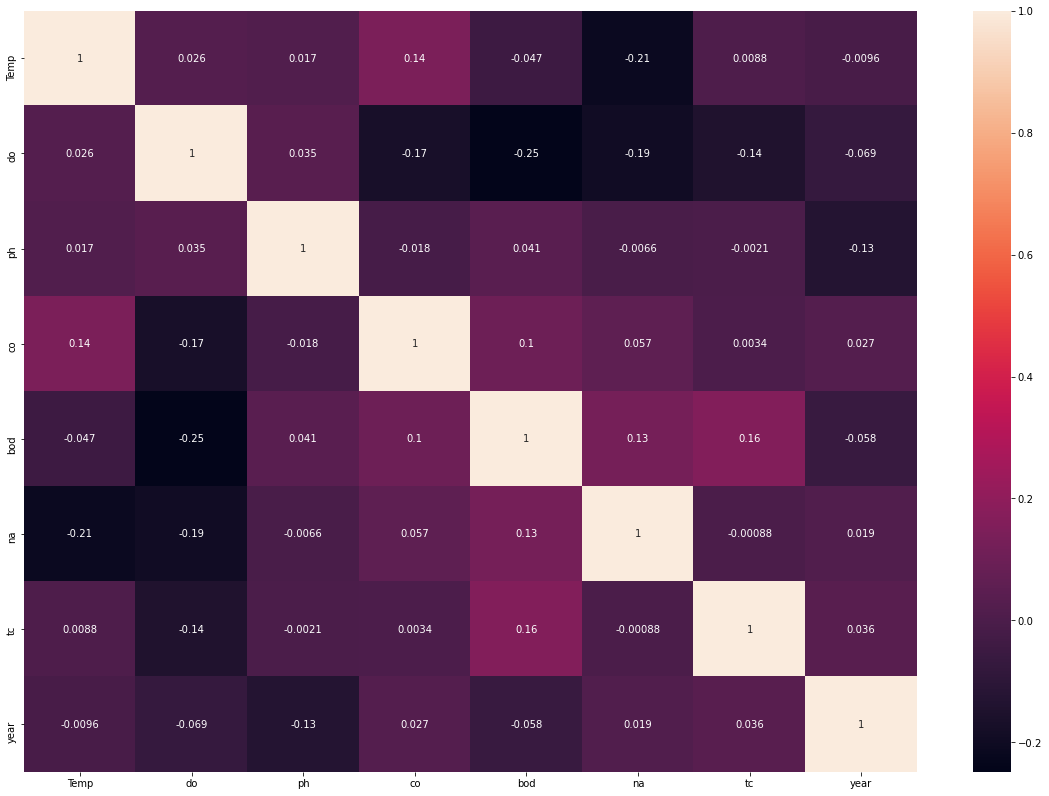

In [19]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(data.corr(),annot = True)
plt.show()

In [20]:
#calulation of Ph
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

In [21]:
#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [22]:
#calculation of total coliform
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [23]:
#calc of B.D.O
data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

In [24]:
#calculation of electrical conductivity
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))

In [25]:
#Calulation of nitrate
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

In [26]:
data.head()
data.dtypes

station      object
location     object
state        object
Temp        float64
do          float64
ph          float64
co          float64
bod         float64
na          float64
tc          float64
year          int64
npH           int64
ndo           int64
nco           int64
nbdo          int64
nec           int64
nna           int64
dtype: object

In [27]:
# Claculate water quality index WQI
data['wph']=data.npH * 0.165
data['wdo']=data.ndo * 0.281
data['wbdo']=data.nbdo * 0.234
data['wec']=data.nec* 0.009
data['wna']=data.nna * 0.028
data['wco']=data.nco * 0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco 
data

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


In [28]:
#calculation overall wqi for each year
average=data.groupby('year')['wqi'].mean()

In [29]:
average.head()

year
2003    66.239545
2004    61.290000
2005    73.762689
2006    72.909714
2007    74.233000
Name: wqi, dtype: float64

In [30]:
data1=average.reset_index(level=0,inplace=False)
data1

,year,wqi
0,2003,66.239545
1,2004,61.290000
2,2005,73.762689
3,2006,72.909714
4,2007,74.233000
5,2008,73.506289
6,2009,74.456685
7,2010,75.454787
8,2011,76.666580
9,2012,79.496712


## Data Visualization

<AxesSubplot:>

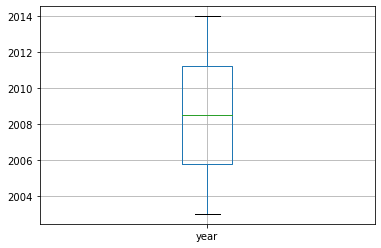

In [31]:
#Data Visualization
data1.boxplot(column='year')

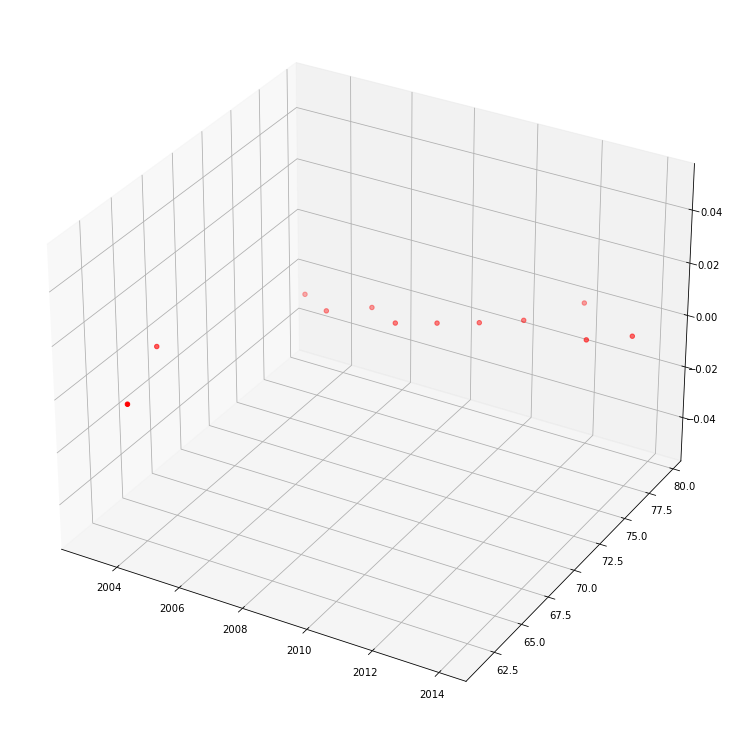

,year,wqi
0,2003,66.239545
1,2004,61.290000
2,2005,73.762689
3,2006,72.909714
4,2007,74.233000
5,2008,73.506289
6,2009,74.456685
7,2010,75.454787
8,2011,76.666580
9,2012,79.496712


In [32]:
#visualizing the filttered data

year=data1['year'].values
AQI=data1['wqi'].values
data1['wqi']=pd.to_numeric(data1['wqi'])
data1['year']=pd.to_numeric(data1['year'])

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='red')
plt.show()
data1

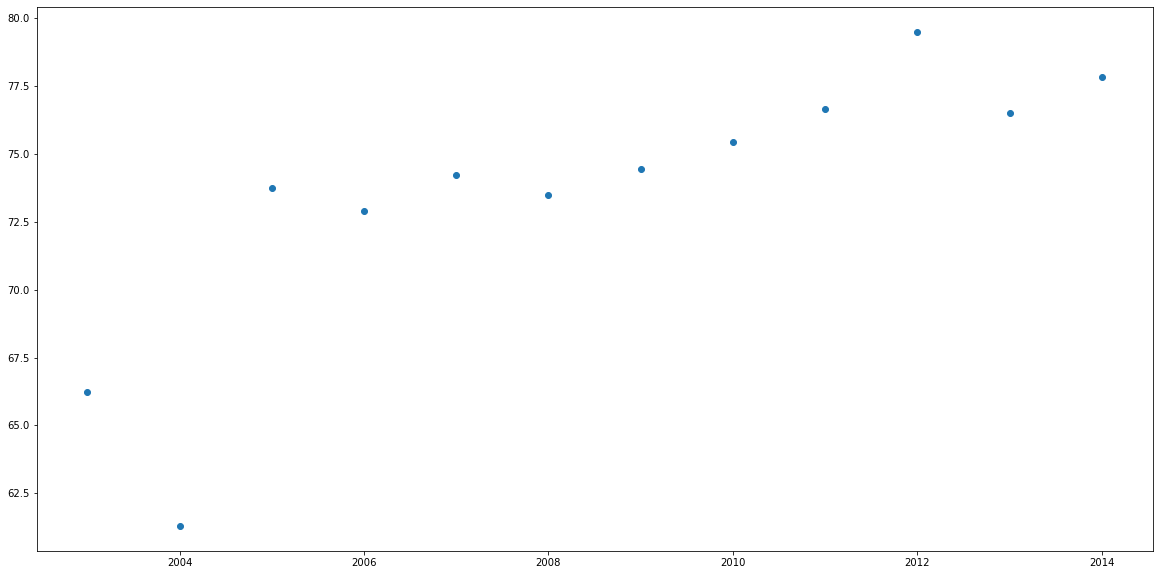

In [33]:
#scatter plot of data points
cols =['year']
y = data1['wqi']
x=data1[cols]

plt.scatter(x,y)
plt.show()

In [34]:
data.head(20)

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,30.0,5.5,7.4,81.0,1.500000,0.1,4049.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,29.2,6.1,6.7,308.0,1.400000,0.3,5672.0,...,100,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44
7,3185,RIVER MANDOVI AT AMONA BRIDGE,GOA,29.6,6.4,6.7,414.0,1.000000,0.2,9423.0,...,100,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44
8,3186,RIVER MANDOVI AT IFFI JETTY,GOA,30.0,6.4,7.6,305.0,2.200000,0.1,4990.0,...,100,0,100,16.5,28.10,23.40,0.00,2.8,11.24,82.04
9,3187,RIVER MANDOVI NEAR HOTEL MARRIOT,GOA,30.1,6.3,7.6,77.0,2.300000,0.1,4301.0,...,100,80,100,16.5,28.10,23.40,0.72,2.8,11.24,82.76


In [35]:
data.tail(20)

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
1971,1631,"MYNTDU RIVER JOWAI, MEGHALAYA",NAN,15.000000,6.9,142.0,7.3,2.2,1.623079,1573.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,11.24,66.44
1972,1632,"GANOL RIVER TURA, MEGHALAYA",NAN,20.000000,6.9,145.0,7.8,1.8,1.623079,245.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,16.86,72.06
1973,1633,"SIMSANG RIVER WILLIAMNAGAR, MEGHALAYA",NAN,21.000000,7.0,145.0,7.3,2.3,1.623079,363.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,16.86,72.06
1974,1455,"RUSHIKULYA AT GANJAM U/S, ORISSA",NAN,30.000000,8.1,569.0,8.2,1.6,1.028000,6050.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,11.24,66.44
1975,1456,"RUSHIKULYA AT GANJAM D/S, ORISSA",NAN,27.000000,7.7,28598.0,7.7,1.7,0.962000,3200.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,11.24,66.44
1976,1642,"NAGAVALLI AT JAYKAYPUR D/S, ORISSA",NAN,30.000000,7.4,219.0,6.8,3.0,0.964000,11300.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,0.00,55.20
1977,1643,"NAGAVALLI AT RAYAGADA D/S, ORISSA",NAN,29.000000,7.2,198.0,7.2,2.1,1.030000,4950.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,11.24,66.44
1978,1685,"ARASALAR RIVER KARAIKAL REGION, PONDICHERRY",NAN,29.000000,8.0,978.0,5.4,9.0,1.240000,533687.16568,...,60,100,100,0.0,28.1,14.04,0.9,2.8,0.00,45.84
1979,1717,"KODRA DAM, MOUNT ABU, RAJASTHAN",NAN,21.000000,7.6,203.0,6.3,1.9,0.107000,109.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,16.86,72.06
1980,1159,TAMBIRAPARANI AT BDG.NR. MADURA COATS LTD.PAPA...,NAN,29.000000,7.2,150.0,7.5,1.3,0.142000,327.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,16.86,72.06


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

<AxesSubplot:xlabel='wqi', ylabel='count'>

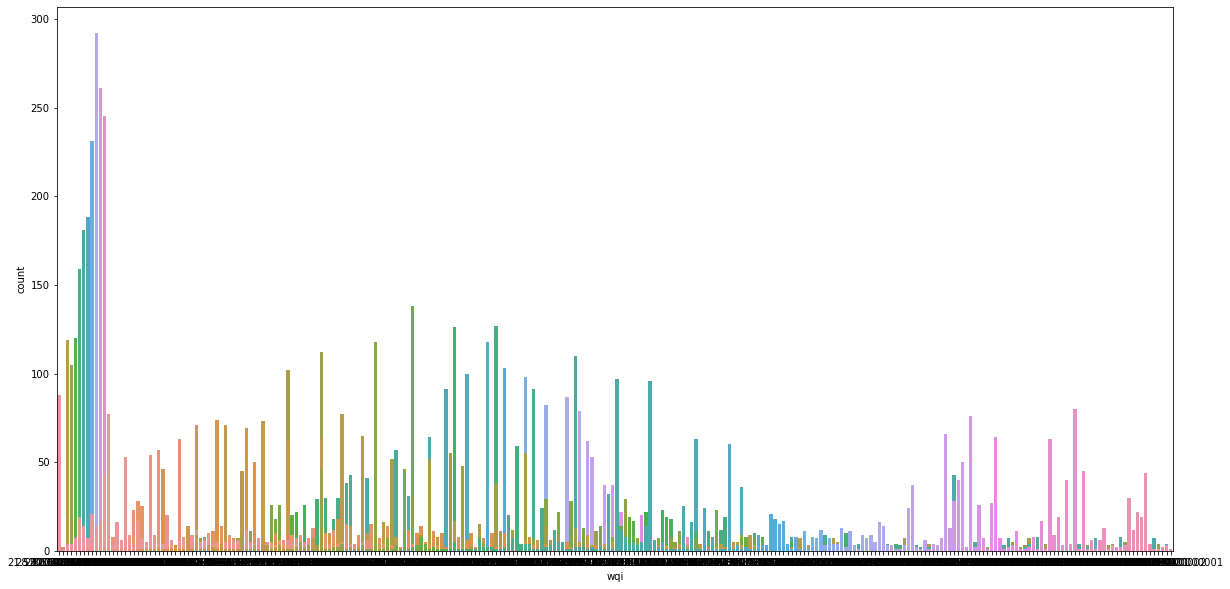

In [36]:
sns.countplot(data['year']) 
sns.countplot(data['do'])
sns.countplot(data['ph'])
sns.countplot(data['co'])
sns.countplot(data['bod'])
sns.countplot(data['na'])
sns.countplot(data['tc'])
sns.countplot(data['wqi'])

In [37]:
#Removing un necessary columns location state and the columnn created to calculate Water Quality Index
data.drop(['Temp','station','location','state','nbdo',"nec","nna","wph","wdo","wbdo","wec","wna","wco","npH","ndo","nco"],axis = 1,inplace=True)

In [38]:
data.head()

,do,ph,co,bod,na,tc,year,wqi
0,6.7,7.5,203.0,6.940049,0.1,27.0,2014,84.46
1,5.7,7.2,189.0,2.000000,0.2,8391.0,2014,76.96
2,6.3,6.9,179.0,1.700000,0.1,5330.0,2014,79.28
3,5.8,6.9,64.0,3.800000,0.5,8443.0,2014,69.34
4,5.8,7.3,83.0,1.900000,0.4,5500.0,2014,77.14


In [39]:
data.columns

Index(['do', 'ph', 'co', 'bod', 'na', 'tc', 'year', 'wqi'], dtype='object')

# Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check **RSME** Score
7. Plot graph

In [40]:
#Splitting the data into dependent and independent variables

In [41]:
x = data.iloc[:,0:7].values
y = data.iloc[:,7:].values

In [42]:
x

array([[6.70000000e+00, 7.50000000e+00, 2.03000000e+02, ...,
        1.00000000e-01, 2.70000000e+01, 2.01400000e+03],
       [5.70000000e+00, 7.20000000e+00, 1.89000000e+02, ...,
        2.00000000e-01, 8.39100000e+03, 2.01400000e+03],
       [6.30000000e+00, 6.90000000e+00, 1.79000000e+02, ...,
        1.00000000e-01, 5.33000000e+03, 2.01400000e+03],
       ...,
       [7.60000000e+00, 9.80000000e+01, 6.20000000e+00, ...,
        1.62307871e+00, 5.70000000e+02, 2.00300000e+03],
       [7.70000000e+00, 9.10000000e+01, 6.50000000e+00, ...,
        1.62307871e+00, 5.62000000e+02, 2.00300000e+03],
       [7.60000000e+00, 1.10000000e+02, 5.70000000e+00, ...,
        1.62307871e+00, 5.46000000e+02, 2.00300000e+03]])

In [43]:
x.shape

(1991, 7)

In [44]:
y.shape

(1991, 1)

## Feature Scaling

There is huge disparity between the x values so let us use feature scaling.
Feature scaling is a method used to normalize the range of independent variables or features of data. 

## Splitting the data into training and testing set

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

In [46]:
X_train.shape

(1592, 7)

In [47]:
X_test.shape

(399, 7)

In [48]:
y_train.shape

(1592, 1)

In [49]:
y_test.shape

(399, 1)

Random Forest Regressor 

	A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
	n_estimators = number of trees in the forest


In [50]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(n_estimators = 10 ,random_state = 0)
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)

/tmp/wsuser/ipykernel_154/2145497779.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_rf.fit(X_train, y_train)


In [51]:
y_pred

array([30.592, 75.02 , 93.82 , 88.2  , 67.38 , 93.82 , 70.8  , 82.742,
       28.192, 88.02 , 88.2  , 82.94 , 71.88 , 79.64 , 82.94 , 82.608,
       32.724, 69.29 , 70.8  , 73.93 , 77.612, 62.104, 82.04 , 82.58 ,
       85.26 , 33.06 , 83.664, 60.822, 72.464, 88.2  , 66.174, 74.834,
       88.38 , 51.324, 85.242, 72.06 , 87.66 , 87.66 , 72.86 , 83.87 ,
       82.04 , 80.826, 72.06 , 45.676, 88.56 , 71.376, 67.38 , 91.428,
       66.44 , 37.556, 67.06 , 89.386, 55.82 , 82.94 , 76.42 , 85.614,
       82.04 , 68.62 , 78.66 , 70.8  , 83.52 , 60.666, 88.56 , 45.466,
       55.82 , 87.732, 79.64 , 70.904, 66.44 , 82.98 , 93.28 , 93.64 ,
       83.52 , 87.66 , 72.86 , 88.506, 82.94 , 86.684, 82.58 , 82.76 ,
       83.7  , 76.174, 77.868, 84.396, 88.488, 65.32 , 61.238, 83.7  ,
       94.18 , 69.492, 76.214, 78.67 , 66.44 , 83.794, 55.82 , 45.142,
       82.76 , 45.142, 79.46 , 82.98 , 84.608, 77.14 , 66.546, 73.04 ,
       82.94 , 42.61 , 82.04 , 61.44 , 87.66 , 79.64 , 94.18 , 82.94 ,
      

In [52]:
reg_rf.score(X_train, y_train)

0.9948592788089403

In [53]:
reg_rf.score(X_test, y_test)

0.9693677515387747

In [54]:
y_test[10:15]

array([[88.2 ],
       [82.94],
       [71.88],
       [79.64],
       [82.94]])

In [55]:
y_pred[10:15]

array([88.2 , 82.94, 71.88, 79.64, 82.94])

In [56]:
# Model Analysis

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


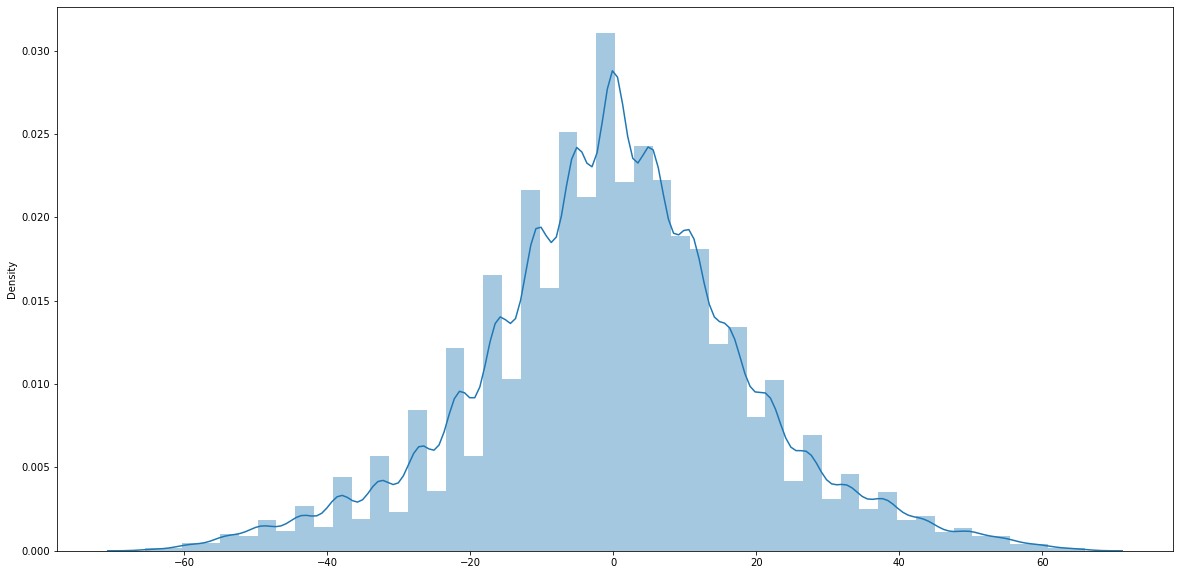

In [57]:
sns.distplot(y_test-y_pred)
plt.show()

In [58]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.9455288220551438
MSE: 5.619566586466167
RMSE: 2.370562504231046


In [59]:
metrics.r2_score(y_test, y_pred)

0.9693677515387747

In [60]:
### Save the model to reuse it again

In [61]:
import pickle
pickle.dump(reg_rf,open('wqi.pkl','wb'))
model = pickle.load(open('wqi.pkl','rb'))

In [62]:
!pip install ibm_watson_machine_learning

In [63]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com","apikey":"9iJjB450-KLd74qOv2Cy8mWxfRfkAwfpuOxWO8jCFHIW"
}



In [64]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----  ------------------------
ID                                    NAME   CREATED
970a5eb3-6fc4-47c7-93b6-f1bff6938ca8  model  2022-03-05T06:12:12.388Z
------------------------------------  -----  ------------------------


In [65]:
SPACE_ID="970a5eb3-6fc4-47c7-93b6-f1bff6938ca8"

In [66]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [67]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a17-24d8-5082-900f-0ab31fbfd3cb  base
scikit-learn_0.22-py3.6        154010f

In [68]:
import sklearn
sklearn.__version__


'0.23.2'

In [69]:
MODEL_NAME = 'WaterModel'
DEPLOYMENT_NAME = 'model'
WATER_MODEL = reg_rf

In [70]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('default_py3.8')

# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [71]:
#Save model
model_details = wml_client.repository.store_model(
    model=WATER_MODEL, 
    meta_props=model_props, 
    training_data=X_train, 
    training_target=y_train
)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/ibm_watson_machine_learning/repository.py:1458: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [72]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l0',
  'software_spec': {'id': 'ab9e1b80-f2ce-592c-a7d2-4f2344f77194',
   'name': 'default_py3.8'},
  'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
     'endpoint_url': 'not_applicable',
     'secret_access_key': 'not_applicable'},
    'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'},
      {'name': 'f6', 'type': 'float'}],
     'id': '1',
     'type': 'ndarray'},
    'type': 's3'}],
  'type': 'scikit-learn_0.23'},
 'metadata': {'created_at': '2022-03-05T12:31:44.233Z',
  'id': 'f09822a3-27df-452e-baf9-de57ffb56abd',
  'modified_at': '2022-03-05T12:31:47.436Z',
  'name': 'WaterModel',
  'owner': 'IBMid-663003A0E5',
  'resource_key': '6a245755-b563-4f0c-9

In [73]:
model_uid = wml_client.repository.get_model_uid(model_details); model_uid

This method is deprecated, please use get_model_id()


'f09822a3-27df-452e-baf9-de57ffb56abd'

In [74]:
wml_client.connections.list_datasource_types()

-------------------------  ------------------------------------  --------  ------
NAME                       DATASOURCE_ID                         TYPE      STATUS
informix                   029e5d1c-ba73-4b09-b742-14c3a39b6cf9  database  active
postgresql-ibmcloud        048ed1bf-516c-46f0-ae90-fa3349d8bc1c  database  active
googlecloudstorage         05b7f0ea-6ae4-45e2-a455-cc280f110825  file      active
impala                     05c58384-862e-4597-b19a-c71ea7e760bc  database  active
salesforce                 06847b16-07b4-4415-a924-c63d11a17aa1  database  active
datastax-ibmcloud          0bd5946b-6fcb-4253-bf76-48b362d24a89  database  active
cosmos                     0c431748-2572-11ea-978f-2e728ce88125  file      active
odbc-datastage             0ca92c3d-0e46-3b42-a573-77958d53c9be  database  active
mysql-compose              0cd4b64c-b485-47ed-a8c4-329c25412de3  database  active
hive                       0fd83fe5-8995-4e2e-a1be-679bb8813a6d  database  active
cognos-analytics

In [75]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}



In [76]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_uid, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: 'f09822a3-27df-452e-baf9-de57ffb56abd' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='574b29c7-1949-4f2c-bdbf-9380f5094ab6'
------------------------------------------------------------------------------------------------




In [78]:
import requests

# NOTE: you must manually set API_KEY below using information retrieved from your IBM Cloud account.
API_KEY = "9iJjB450-KLd74qOv2Cy8mWxfRfkAwfpuOxWO8jCFHIW"
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey": API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"input_data": [{"fields": [['do', 'ph', 'co', 'bod', 'na', 'tc', 'year']], "values": [[6.7,7.5,203.0,6.940049,0.1,27.0,2014]]}]}

response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/574b29c7-1949-4f2c-bdbf-9380f5094ab6/predictions?version=2022-03-05', json=payload_scoring, headers={'Authorization': 'Bearer ' + mltoken})
print("Scoring response")
print(response_scoring.json())

Scoring response
{'predictions': [{'fields': ['prediction'], 'values': [[85.30600000000001]]}]}
